# Deep vs Shallow 

## First function: Sinc(x) = sin(x)/x

X-shape :  torch.Size([300, 1]) 
Y-shape :  torch.Size([300, 1])
<class 'torch.Tensor'>


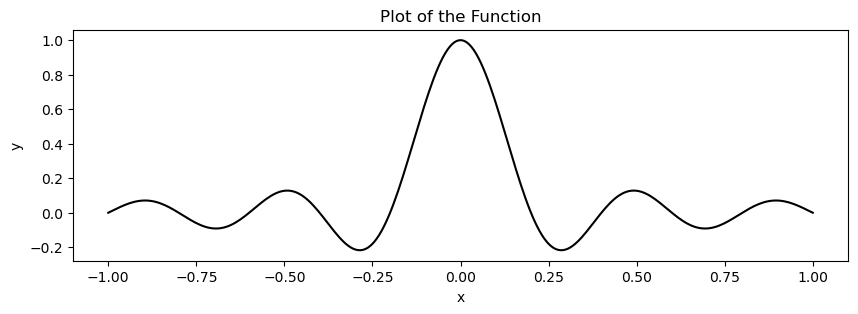

In [56]:
#Import relevant libraries
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math
import gc

#Create a function
torch.manual_seed(1)
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = (np.sin(5*np.pi*x))/(5*np.pi*x)
print('X-shape : ', x.shape, '\nY-shape : ', y.shape)
print(type(x))
plt.figure(figsize=(10,3))
plt.plot(x, y, color = 'black')
plt.title('Plot of the Function')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Fig1.png')
plt.show()

In [57]:
def train_func(model, x, y):
    model.train()
    max_epoch = 15000
    epoch_arr, loss_arr = [], []
    isConverged = False
    epoch = 0

    while isConverged==False:
        epoch += 1
        predict = model(x)
        loss = loss_function(predict, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch%1000 == 0:
            print(f'epoch: {epoch}, loss = {loss.item():.4f}', end='\r', flush= True)
        
        if epoch == max_epoch:
            print("Maximum Epoch Reached")
            isConverged = True
        elif loss_arr[-1] < 1e-3:
            print(f"Convergence Reached at epoch {epoch}")
            print(f"Loss: {loss_arr[-1]} < 1e-3 at epoch {epoch}")
            isConverged=True
        
    return epoch_arr, loss_arr, predict
            

In [58]:
def paramerter_count(m,i):
    a=[]
    for k in m.parameters():
        a.append(torch.numel(k))
    print(f"Total no of parameters in Model{i}   :{np.sum(a)}")
    
def model_weight(m,flag,i):
    if flag:
        print("\nModel "+str(i)+" weight and bias before training\n")
    else:print("\nModel "+str(i)+" weight and bias after training\n")
    for param in m.state_dict():
        print(param, "\t",m.state_dict()[param])

### Model M0 (Example model from HW Slide 6)

In [59]:
class M0(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = torch.nn.Linear(1, 5)
        self.hidden2 = torch.nn.Linear(5, 10)
        self.hidden3 = torch.nn.Linear(10, 10)
        self.hidden4 = torch.nn.Linear(10, 10)
        self.hidden5 = torch.nn.Linear(10, 10)
        self.hidden6 = torch.nn.Linear(10, 10)
        self.hidden7 = torch.nn.Linear(10, 5)
        self.predict = torch.nn.Linear(5, 1)


    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.hidden1(x))
        x = torch.nn.functional.leaky_relu(self.hidden2(x))
        x = torch.nn.functional.leaky_relu(self.hidden3(x))
        x = torch.nn.functional.leaky_relu(self.hidden4(x))
        x = torch.nn.functional.leaky_relu(self.hidden5(x))
        x = torch.nn.functional.leaky_relu(self.hidden6(x))
        x = torch.nn.functional.leaky_relu(self.hidden7(x))
        x = self.predict(x)
        return x


In [63]:
m0 = M0()
optimizer = torch.optim.Adam(m0.parameters(), lr=0.0005, weight_decay=1e-4)
loss_function = torch.nn.MSELoss() #Mean Square error
# paramerter_count(m0,0)
# model_weight(m0,1,0)
# print(m0)
M0_epoch_arr, M0_loss_arr, M0_prediction = train_func(m0,x,y)
# model_weight(m0,0,0)


RuntimeError: mat1 and mat2 must have the same dtype, but got Float and Double

In [7]:
plt.figure(figsize=(10,3))
plt.plot(M0_epoch_arr, M0_loss_arr, color = 'red')
plt.title("Model 0 Loss")
plt.savefig('Fig2.png')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(x, y, color = "black")
plt.plot(x, M0_prediction.data, color="red")
plt.title('Model 0 Prediction')
plt.savefig('Fig3.png')
plt.show()

NameError: name 'M0_epoch_arr' is not defined

<Figure size 1000x300 with 0 Axes>

### Model M1 (Example model from HW Slide 6)

In [ ]:
class M1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = torch.nn.Linear(1, 10)
        self.hidden2 = torch.nn.Linear(10, 18)
        self.hidden3 = torch.nn.Linear(18, 15)
        self.hidden4 = torch.nn.Linear(15, 4)
        self.predict = torch.nn.Linear(4, 1)
        self.double()

    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden1(x))
        x = torch.nn.functional.relu(self.hidden2(x))
        x = torch.nn.functional.relu(self.hidden3(x))
        x = torch.nn.functional.relu(self.hidden4(x))
        x = self.predict(x)
        return x

In [ ]:
m1 = M1()
optimizer = torch.optim.Adam(m1.parameters(), lr=0.0005, weight_decay=1e-4)
loss_function = torch.nn.MSELoss() #Mean Square error
paramerter_count(m1,1)
model_weight(m1,1,1)
M1_epoch_arr, M1_loss_arr, M1_prediction = train_func(m1,x,y)
model_weight(m1,0,1)

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(M1_epoch_arr, M1_loss_arr,color = 'green')
plt.title("Model 1 Loss")
plt.savefig('Fig4.png')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(x, y, color = "black")
plt.plot(x, M1_prediction.data, color="green")
plt.title('Model 1 Prediction')
plt.savefig('Fig5.png')
plt.show()

### Model M2 (Example model from HW Slide 6)


In [ ]:
class M2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = torch.nn.Linear(1, 190)
        self.predict = torch.nn.Linear(190, 1)
        self.double()

    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden1(x))
        x = self.predict(x)
        return x

In [ ]:
m2 = M2()
optimizer = torch.optim.Adam(m2.parameters(), lr=0.0005, weight_decay=1e-4)
loss_function = torch.nn.MSELoss() #Mean Square error
paramerter_count(m2,2)
model_weight(m2,1,2)
M2_epoch_arr, M2_loss_arr, M2_prediction = train_func(m2,x,y)
model_weight(m2,0,2)

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(M2_epoch_arr, M2_loss_arr, color = 'blue')
plt.title("Model 2 Loss")
plt.savefig('Fig6.png')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(x, y, color = "black")
plt.plot(x, M2_prediction.data, color="blue")
plt.title('Model 2 Prediction')
plt.savefig('Fig7.png')
plt.show()

### Comparison of three models

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(M0_epoch_arr, M0_loss_arr, color='red', label = 'Model0')
plt.plot(M1_epoch_arr, M1_loss_arr, color='green', label = 'Model1')
plt.plot(M2_epoch_arr, M2_loss_arr, color='blue', label = 'Model2')
plt.legend()
plt.title("Comparison of Loss in three different models")
plt.savefig('Fig8.png')
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(x, y, color = "black", label = 'True')
plt.plot(x, M0_prediction.data, color='red', label='Model1 Prediction')
plt.plot(x, M1_prediction.data, color='green', label = 'Model2 Prediction')
plt.plot(x, M2_prediction.data, color='blue', label = 'Model3 Prediction')
plt.legend()
plt.title("Comparison of Loss in three different models")
plt.savefig('Fig9.png')
plt.show()

## Second function

In [ ]:
from scipy import signal
torch.set_default_dtype(torch.float64)
#Create a function
torch.manual_seed(1)
frequency = 3  # Frequency of the sawtooth wave in Hz
duration = 1   # Duration of the waveform in seconds
amplitude = 1  # Amplitude of the waveform
x1 = torch.unsqueeze(torch.linspace(-1,1,300), dim=1)
y1 = signal.sawtooth(2*np.pi*frequency*x1)
y1 = torch.from_numpy(y1)
# print(x1.dtype)
# print(y1.dtype)
plt.figure(figsize=(10,3))
plt.plot(x1, y1, color = 'black')
plt.title('Plot of the Function')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Fig10.png')
plt.show()

In [ ]:
m4 = M0()
optimizer = torch.optim.Adam(m4.parameters(), lr=0.0005, weight_decay=1e-4)
loss_function = torch.nn.MSELoss() #Mean Square error
M4_epoch_arr, M4_loss_arr, M4_prediction = train_func(m4,x1,y1)

In [ ]:
m5 = M1()
optimizer = torch.optim.Adam(m5.parameters(), lr=0.0005, weight_decay=1e-4)
loss_function = torch.nn.MSELoss() #Mean Square error
M5_epoch_arr, M5_loss_arr, M5_prediction = train_func(m5,x1,y1)

In [ ]:
m6 = M2()
optimizer = torch.optim.Adam(m6.parameters(), lr=0.0005, weight_decay=1e-4)
loss_function = torch.nn.MSELoss() #Mean Square error
M6_epoch_arr, M6_loss_arr, M6_prediction = train_func(m6,x1,y1)

In [14]:
plt.figure(figsize=(10,3))
plt.plot(M4_epoch_arr, M4_loss_arr, color='red', label = 'Model0')
plt.plot(M5_epoch_arr, M5_loss_arr, color='green', label = 'Model1')
plt.plot(M6_epoch_arr, M6_loss_arr, color='blue', label = 'Model2')
plt.legend()
plt.title("Comparison of Loss in three different models")
plt.show()
plt.savefig('Fig11.png')

NameError: name 'M4_epoch_arr' is not defined

<Figure size 1000x300 with 0 Axes>

In [15]:
plt.figure(figsize=(10,3))
plt.plot(x1, y1, color = "black", label = 'True')
plt.plot(x1, M4_prediction.data, color='red', label='Model1 Prediction')
plt.plot(x1, M5_prediction.data, color='green', label = 'Model2 Prediction')
plt.plot(x1, M6_prediction.data, color='blue', label = 'Model3 Prediction')
plt.legend()
plt.title("Comparison of Loss in three different models")
plt.show()
plt.savefig('Fig12.png')

NameError: name 'x1' is not defined

<Figure size 1000x300 with 0 Axes>

## Using actual data

MNIST training data size =  60000
MNIST test data size =  10000
torch.Size([600, 1, 28, 28])


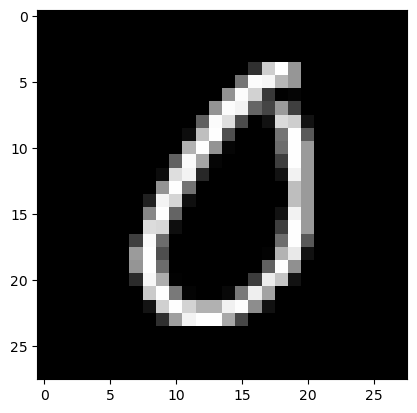

In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


mnist_trainset = datasets.MNIST(root='./data', train = True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081))]))
mnist_testset = datasets.MNIST(root='./data', train = False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081))]))
print(f"MNIST training data size =  {len(mnist_trainset)}")
print(f"MNIST test data size =  {len(mnist_testset)}")

train_loader = torch.utils.data.DataLoader(dataset=mnist_trainset, batch_size=600, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_testset, batch_size=100, shuffle = True)

images, labels = next(iter(train_loader))
print(images.shape)
#Sample Image
plt.imshow(images[1].reshape(28,28), cmap='gray');

## CNN1 model

In [68]:
class CNN1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)  #1st convolution 
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5) #2nd convolution
        self.conv2_drop = nn.Dropout2d()  #dropout
        self.fc1 = torch.nn.Linear(320, 50)     #Linear transformation of incoming data y=xA'+b
        self.fc2 = torch.nn.Linear(50, 10)      

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)    #flattening
        x = F.relu(self.fc1(x)) #fully connected
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)    #fully commected
        return F.log_softmax(x, dim=1)
    

In [69]:
def train_func_mnist(model, train_loader, max_epoch):
    model.train()
    epoch_arr, loss_arr = [], []
    acc_arr = []
    epoch = 0
    while epoch<max_epoch:
        epoch += 1
        sample_size = 0
        correct_prediction = 0
        lossTotal = 0
        accuracy = 0
        for i, (images,labels) in enumerate(train_loader):
            sample_size += labels.size(0)
            output = model(images)       
            _,predicted = torch.max(output.data,1)
            correct_prediction += (predicted==labels).sum().item();
            loss = F.nll_loss(output, labels)
            lossTotal += loss.detach().numpy()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        epoch_arr.append(epoch)
        avg_loss = lossTotal/(i+1)
        accuracy = correct_prediction/sample_size*100
        loss_arr.append(avg_loss)  #average loss over an epoch
        acc_arr.append(accuracy)  #accuracy over an epoch      
        
        print(f'epoch: {epoch}, average_loss = {avg_loss:.4f}, average_accuracy ={accuracy:.2f}')
    return epoch_arr, loss_arr, acc_arr, output

In [70]:
cnn1 = CNN1()
max_epoch = 15
optimizer = torch.optim.Adam(cnn1.parameters(), lr=0.0005, weight_decay=1e-4)
cnn_epoch_arr, cnn_loss_arr, acc_arr, cnn_prediction = train_func_mnist(cnn1,train_loader,max_epoch)

epoch: 1, average_loss = 1.4257, average_accuracy =51.37
epoch: 2, average_loss = 0.5811, average_accuracy =81.83
epoch: 3, average_loss = 0.4191, average_accuracy =87.48
epoch: 4, average_loss = 0.3437, average_accuracy =89.79
epoch: 5, average_loss = 0.2998, average_accuracy =91.23
epoch: 6, average_loss = 0.2676, average_accuracy =92.30
epoch: 7, average_loss = 0.2468, average_accuracy =92.91
epoch: 8, average_loss = 0.2216, average_accuracy =93.58
epoch: 9, average_loss = 0.2148, average_accuracy =93.75
epoch: 10, average_loss = 0.2028, average_accuracy =94.02
epoch: 11, average_loss = 0.1962, average_accuracy =94.28
epoch: 12, average_loss = 0.1875, average_accuracy =94.58
epoch: 13, average_loss = 0.1833, average_accuracy =94.83
epoch: 14, average_loss = 0.1740, average_accuracy =94.98
epoch: 15, average_loss = 0.1698, average_accuracy =95.05


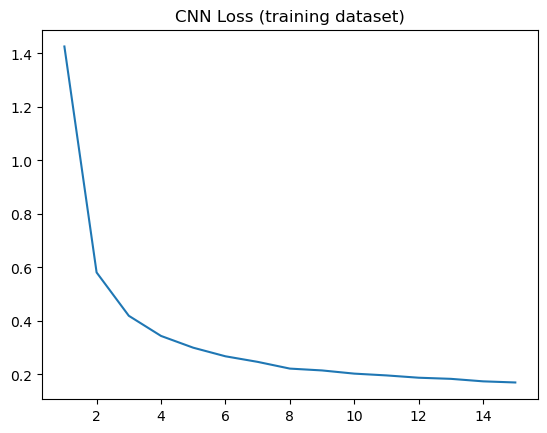

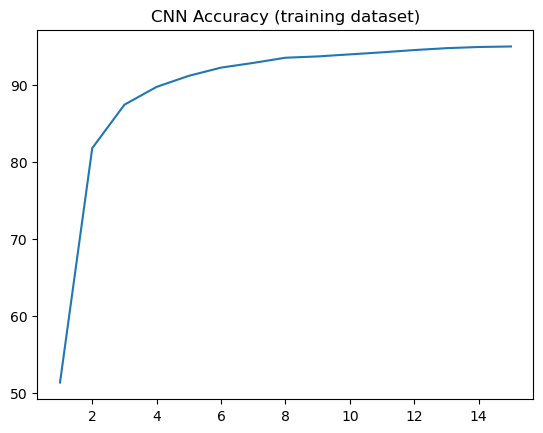

In [71]:
plt.plot(cnn_epoch_arr, cnn_loss_arr)
plt.title("CNN Loss (training dataset)")
plt.show()
plt.savefig('Fig13.png')
plt.plot(cnn_epoch_arr, acc_arr)
plt.title("CNN Accuracy (training dataset)")
plt.savefig('Fig14.png')
plt.show()

In [72]:
def test_func_mnist(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for i, (images,labels) in enumerate(test_loader):
            output = model(images)    
            test_loss += F.nll_loss(output, labels, reduction='sum').item()
            pred = output.max(1,keepdim=True)[1]   #This gets the index for the max log probability
            correct += pred.eq(labels.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)      
    accuracy = correct/len(test_loader.dataset)*100
    print(f'Test set average_loss = {test_loss:.4f}, Accuracy ={accuracy:.2f}%')
    return

In [73]:
cnn1Test = test_func_mnist(cnn1, test_loader)

Test set average_loss = 0.0539, Accuracy =98.09%


### CNN2 model

In [74]:
class CNN2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)  #1st convolution 
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5) #2nd convolution
        self.conv2_drop = nn.Dropout2d()  #dropout
        self.fc1 = torch.nn.Linear(320, 50)     #Linear transformation of incoming data y=xA'+b
        self.fc2 = torch.nn.Linear(50, 20)  
        self.fc3 = torch.nn.Linear(20, 10)  

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)    #flattening
        x = F.relu(self.fc1(x)) #fully connected
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))    #fully commected
        x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
    
    
   

In [75]:
cnn2 = CNN2()
max_epoch = 15
optimizer = torch.optim.Adam(cnn2.parameters(), lr=0.0005, weight_decay=1e-4)
cnn2_epoch_arr, cnn2_loss_arr, acc2_arr, cnn2_prediction = train_func_mnist(cnn2,train_loader,max_epoch)

epoch: 1, average_loss = 1.9484, average_accuracy =29.79
epoch: 2, average_loss = 1.1830, average_accuracy =58.57
epoch: 3, average_loss = 0.9059, average_accuracy =68.87
epoch: 4, average_loss = 0.7689, average_accuracy =74.18
epoch: 5, average_loss = 0.6882, average_accuracy =77.42
epoch: 6, average_loss = 0.6213, average_accuracy =79.72
epoch: 7, average_loss = 0.5831, average_accuracy =81.45
epoch: 8, average_loss = 0.5478, average_accuracy =82.21
epoch: 9, average_loss = 0.5270, average_accuracy =83.09
epoch: 10, average_loss = 0.5094, average_accuracy =83.95
epoch: 11, average_loss = 0.4949, average_accuracy =84.28
epoch: 12, average_loss = 0.4770, average_accuracy =85.15
epoch: 13, average_loss = 0.4566, average_accuracy =85.66
epoch: 14, average_loss = 0.4502, average_accuracy =85.88
epoch: 15, average_loss = 0.4442, average_accuracy =86.14


In [76]:
cnn2Test = test_func_mnist(cnn2, test_loader)

Test set average_loss = 0.0897, Accuracy =97.60%


In [77]:
class CNN3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5)  #1st convolution 
        self.conv2 = nn.Conv2d(20, 20, kernel_size=5) #2nd convolution
        self.conv2_drop = nn.Dropout2d()  #dropout
        self.fc1 = torch.nn.Linear(320, 80)     #Linear transformation of incoming data y=xA'+b
        self.fc2 = torch.nn.Linear(80, 20)  
        self.fc3 = torch.nn.Linear(20, 10)  

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)    #flattening
        x = F.relu(self.fc1(x)) #fully connected
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))    #fully commected
        x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
    
    

In [78]:
cnn3 = CNN3()
max_epoch = 15
optimizer = torch.optim.Adam(cnn3.parameters(), lr=0.0005, weight_decay=1e-4)
cnn3_epoch_arr, cnn3_loss_arr, acc3_arr, cnn3_prediction = train_func_mnist(cnn3,train_loader,max_epoch)

epoch: 1, average_loss = 1.8220, average_accuracy =34.47
epoch: 2, average_loss = 1.0188, average_accuracy =66.10
epoch: 3, average_loss = 0.7355, average_accuracy =76.37
epoch: 4, average_loss = 0.6123, average_accuracy =80.55
epoch: 5, average_loss = 0.5393, average_accuracy =82.73
epoch: 6, average_loss = 0.4937, average_accuracy =84.69
epoch: 7, average_loss = 0.4581, average_accuracy =85.52
epoch: 8, average_loss = 0.4397, average_accuracy =86.19
epoch: 9, average_loss = 0.4109, average_accuracy =87.03
epoch: 10, average_loss = 0.3956, average_accuracy =87.49
epoch: 11, average_loss = 0.3789, average_accuracy =88.00
epoch: 12, average_loss = 0.3702, average_accuracy =87.95
epoch: 13, average_loss = 0.3613, average_accuracy =88.54
epoch: 14, average_loss = 0.3529, average_accuracy =88.77
epoch: 15, average_loss = 0.3414, average_accuracy =88.88


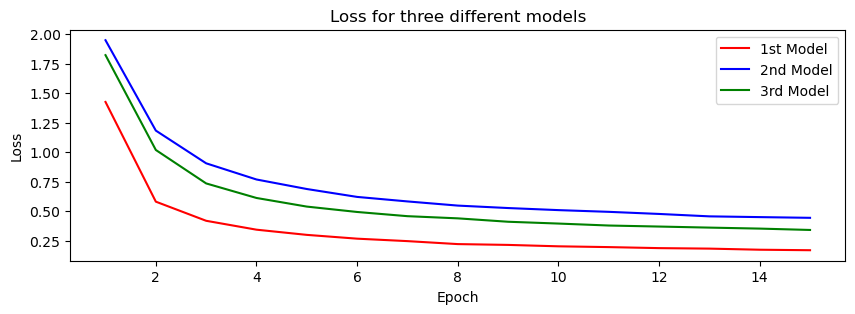

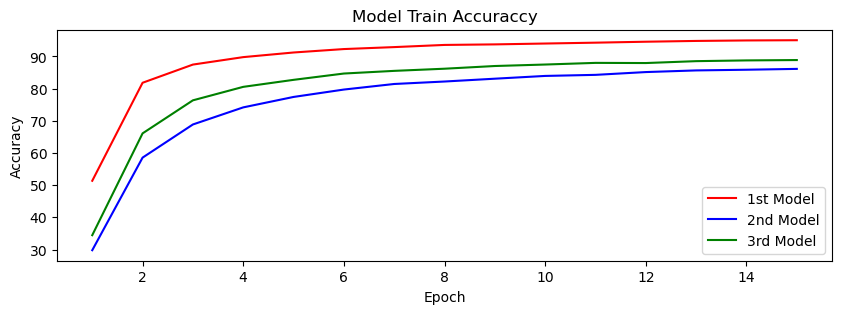

In [79]:
plt.figure(figsize=(10,3))
plt.plot(cnn_epoch_arr,cnn_loss_arr, color = "red")
plt.plot(cnn2_epoch_arr,cnn2_loss_arr, color = "blue")
plt.plot(cnn3_epoch_arr,cnn3_loss_arr, color = "green")
plt.title('Loss for three different models')
plt.legend(['1st Model', '2nd Model','3rd Model'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('Fig15.png')
plt.show()

plt.figure(figsize=(10,3))
plt.plot(cnn_epoch_arr,acc_arr, color = "red")
plt.plot(cnn2_epoch_arr,acc2_arr, color = "blue")
plt.plot(cnn3_epoch_arr,acc3_arr, color = "green")
plt.title('Model Train Accuraccy')
plt.legend(['1st Model', '2nd Model','3rd Model'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('Fig16.png')
plt.show()

In [ ]:
from torchview import draw_graph
model_graph = draw_graph(m0, input_data=x[:])
model_graph.visual_graph